# EDA

In [1]:
from function import *

---

### 1. Overall information

In [2]:
# load data
train = pd.read_csv('data/user_list.csv')

In [3]:
# check shape
print('train shape :', train.shape)

train shape : (22873, 6)


In [4]:
# check information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22873 entries, 0 to 22872
Data columns (total 6 columns):
REG_DATE         22873 non-null object
SEX_ID           22873 non-null object
AGE              22873 non-null int64
WITHDRAW_DATE    922 non-null object
PREF_NAME        15617 non-null object
USER_ID_hash     22873 non-null object
dtypes: int64(1), object(5)
memory usage: 1.0+ MB


In [5]:
# check null
train.isnull().any()

REG_DATE         False
SEX_ID           False
AGE              False
WITHDRAW_DATE     True
PREF_NAME         True
USER_ID_hash     False
dtype: bool

In [6]:
# Unique
print('train unique 갯수')
for i in range(6):
    print('{} : {}개'.format(train.columns[i], len(set(train[train.columns[i]]))))

train unique 갯수
REG_DATE : 22842개
SEX_ID : 2개
AGE : 66개
WITHDRAW_DATE : 920개
PREF_NAME : 48개
USER_ID_hash : 22873개


---

### 2. X data

#### 2.1 Continuous

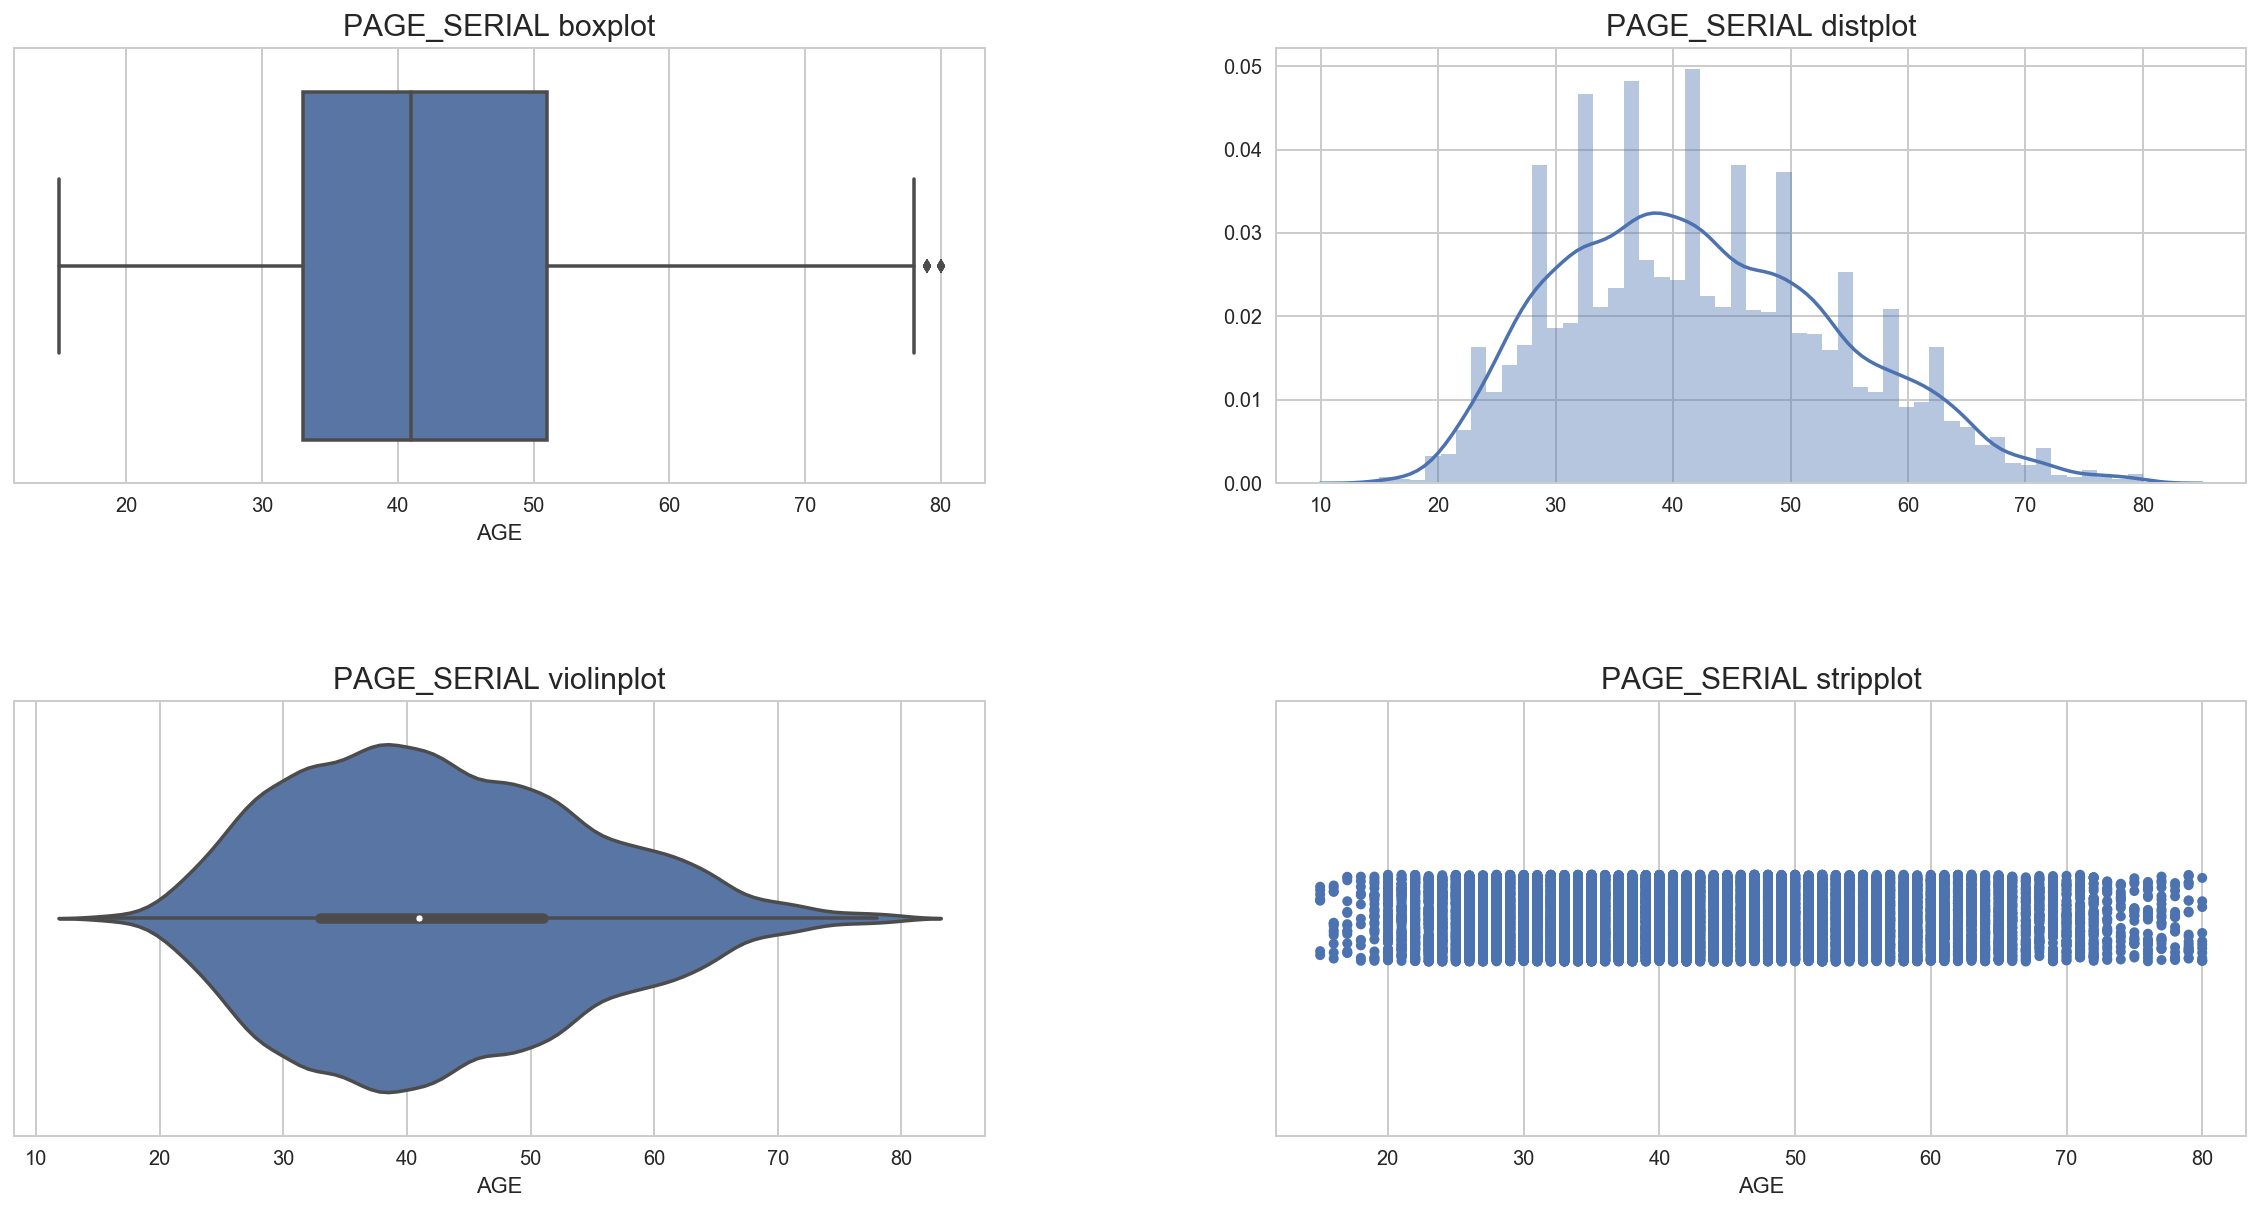

In [7]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

# boxplot
plt.subplot(2,2,1)
sns.boxplot(x = 'AGE', data = train)
plt.title("PAGE_SERIAL boxplot", fontsize = 15)

# distplot
plt.subplot(2,2,2)
sns.distplot(train['AGE'].values)
plt.title("PAGE_SERIAL distplot", fontsize = 15)

# violinplot
plt.subplot(2,2,3)
sns.violinplot(x = 'AGE', data = train)
plt.title("PAGE_SERIAL violinplot", fontsize = 15)

# stripplot
plt.subplot(2,2,4)
sns.stripplot(x = 'AGE', data = train, jitter = True)
plt.title("PAGE_SERIAL stripplot", fontsize = 15)

plt.show()

#### 2.2 Category

In [9]:
train['REG_DATE'] = pd.to_datetime(train['REG_DATE']) 
train['REG_year'] = train['REG_DATE'].dt.year 
train['REG_month'] = train['REG_DATE'].dt.month 
train['REG_weekday'] = train['REG_DATE'].dt.weekday # 요일 (0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일)
train['REG_hour'] = train['REG_DATE'].dt.hour

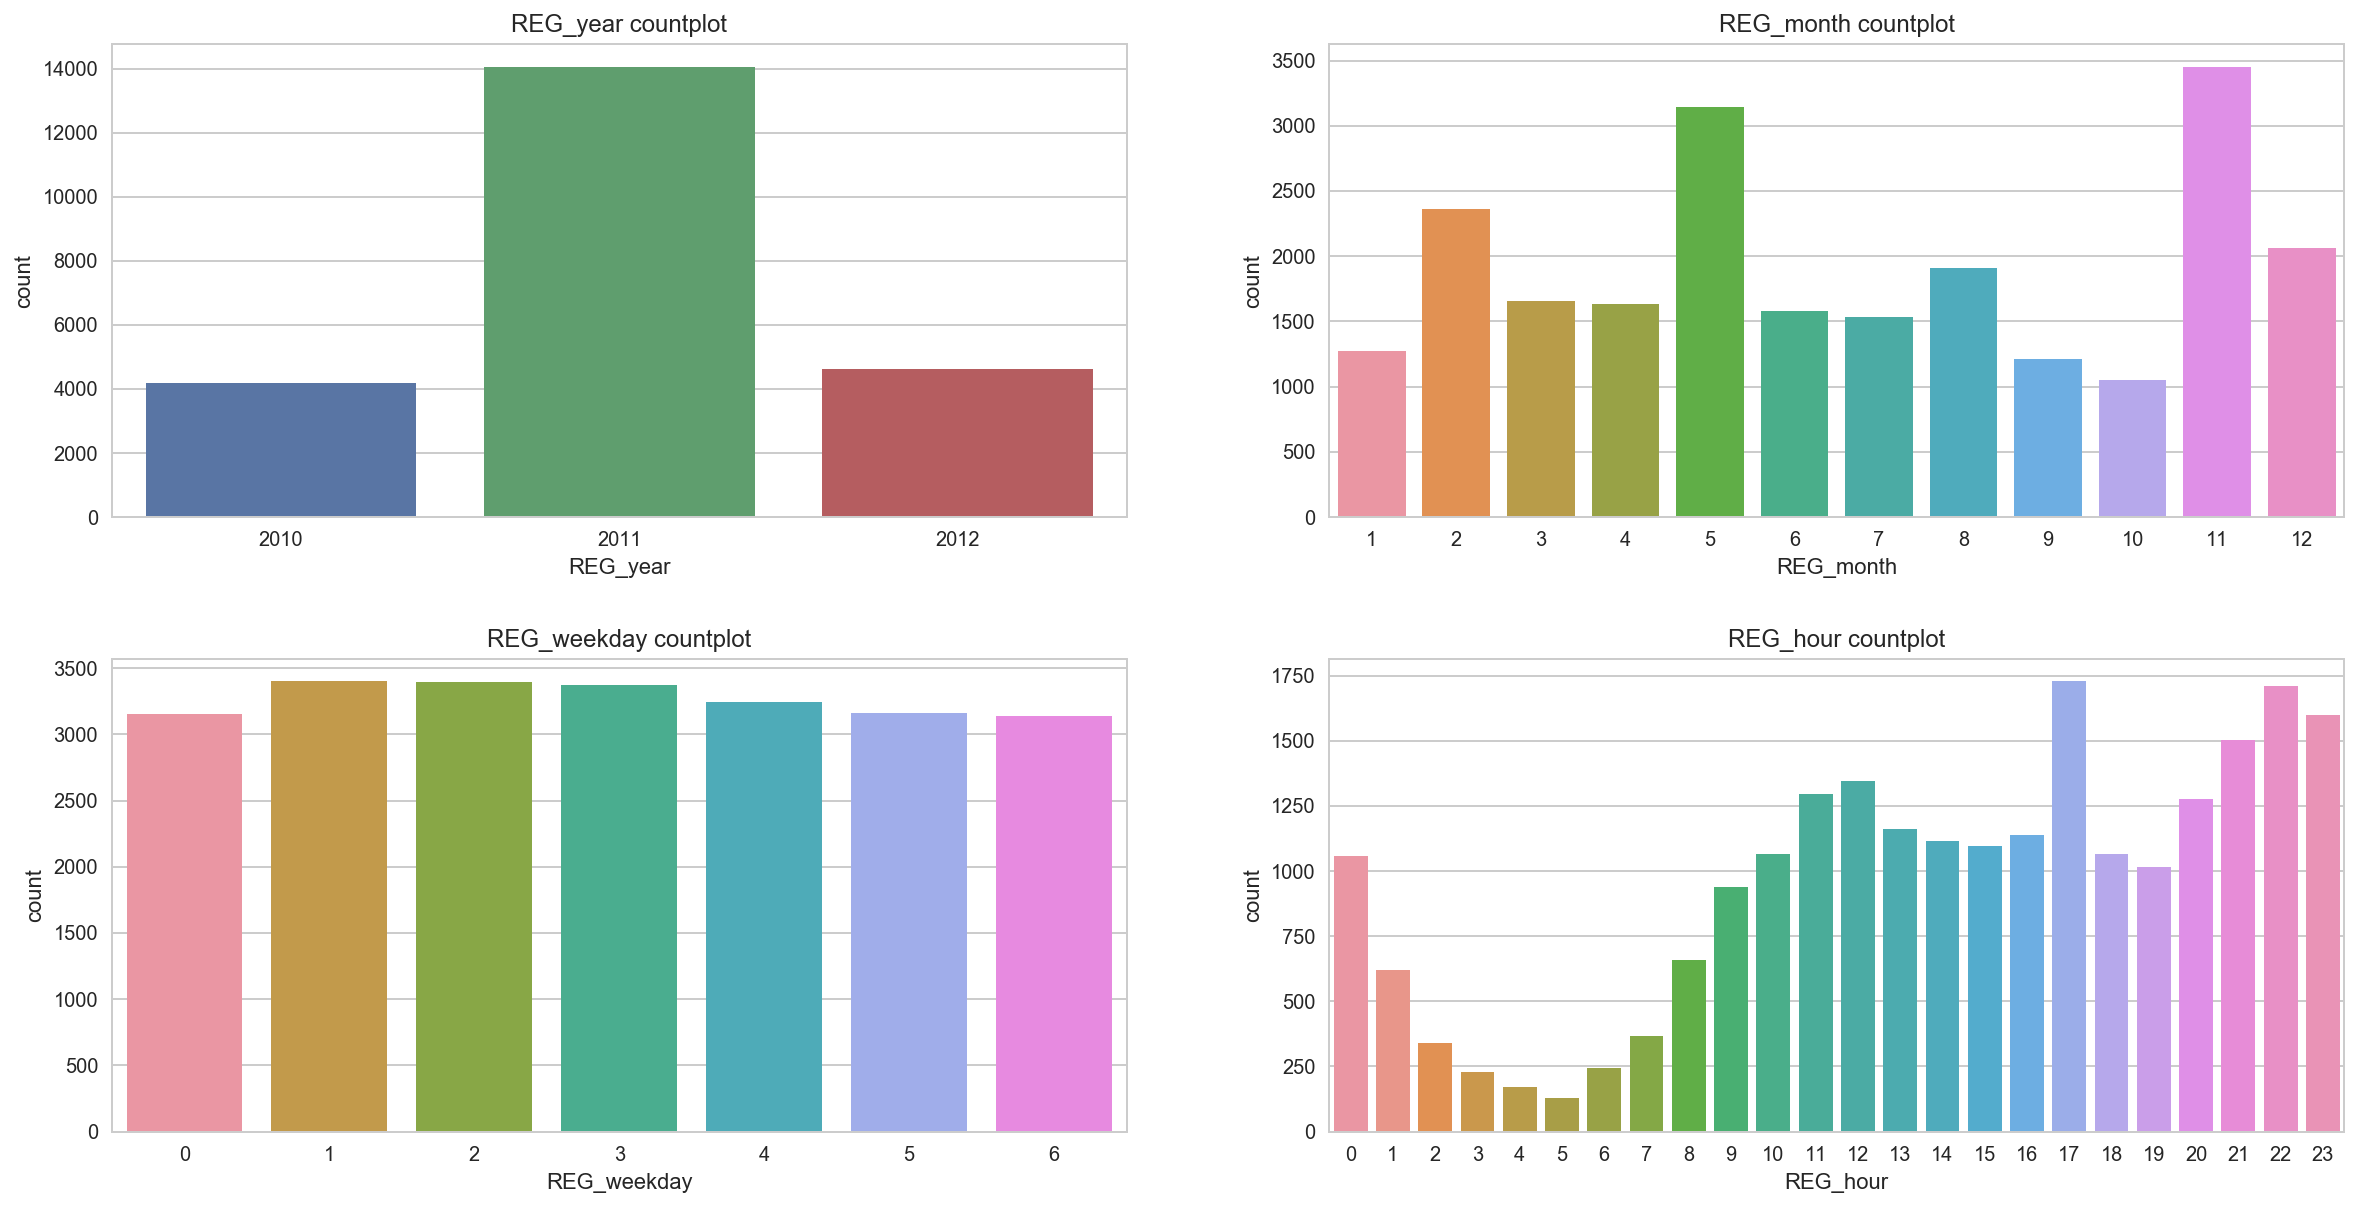

In [11]:
# feature countplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2, 2, i-5)
    sns.countplot(x = train[train.columns[i]], data = train)
    plt.title('{} countplot'.format(train.columns[i]))

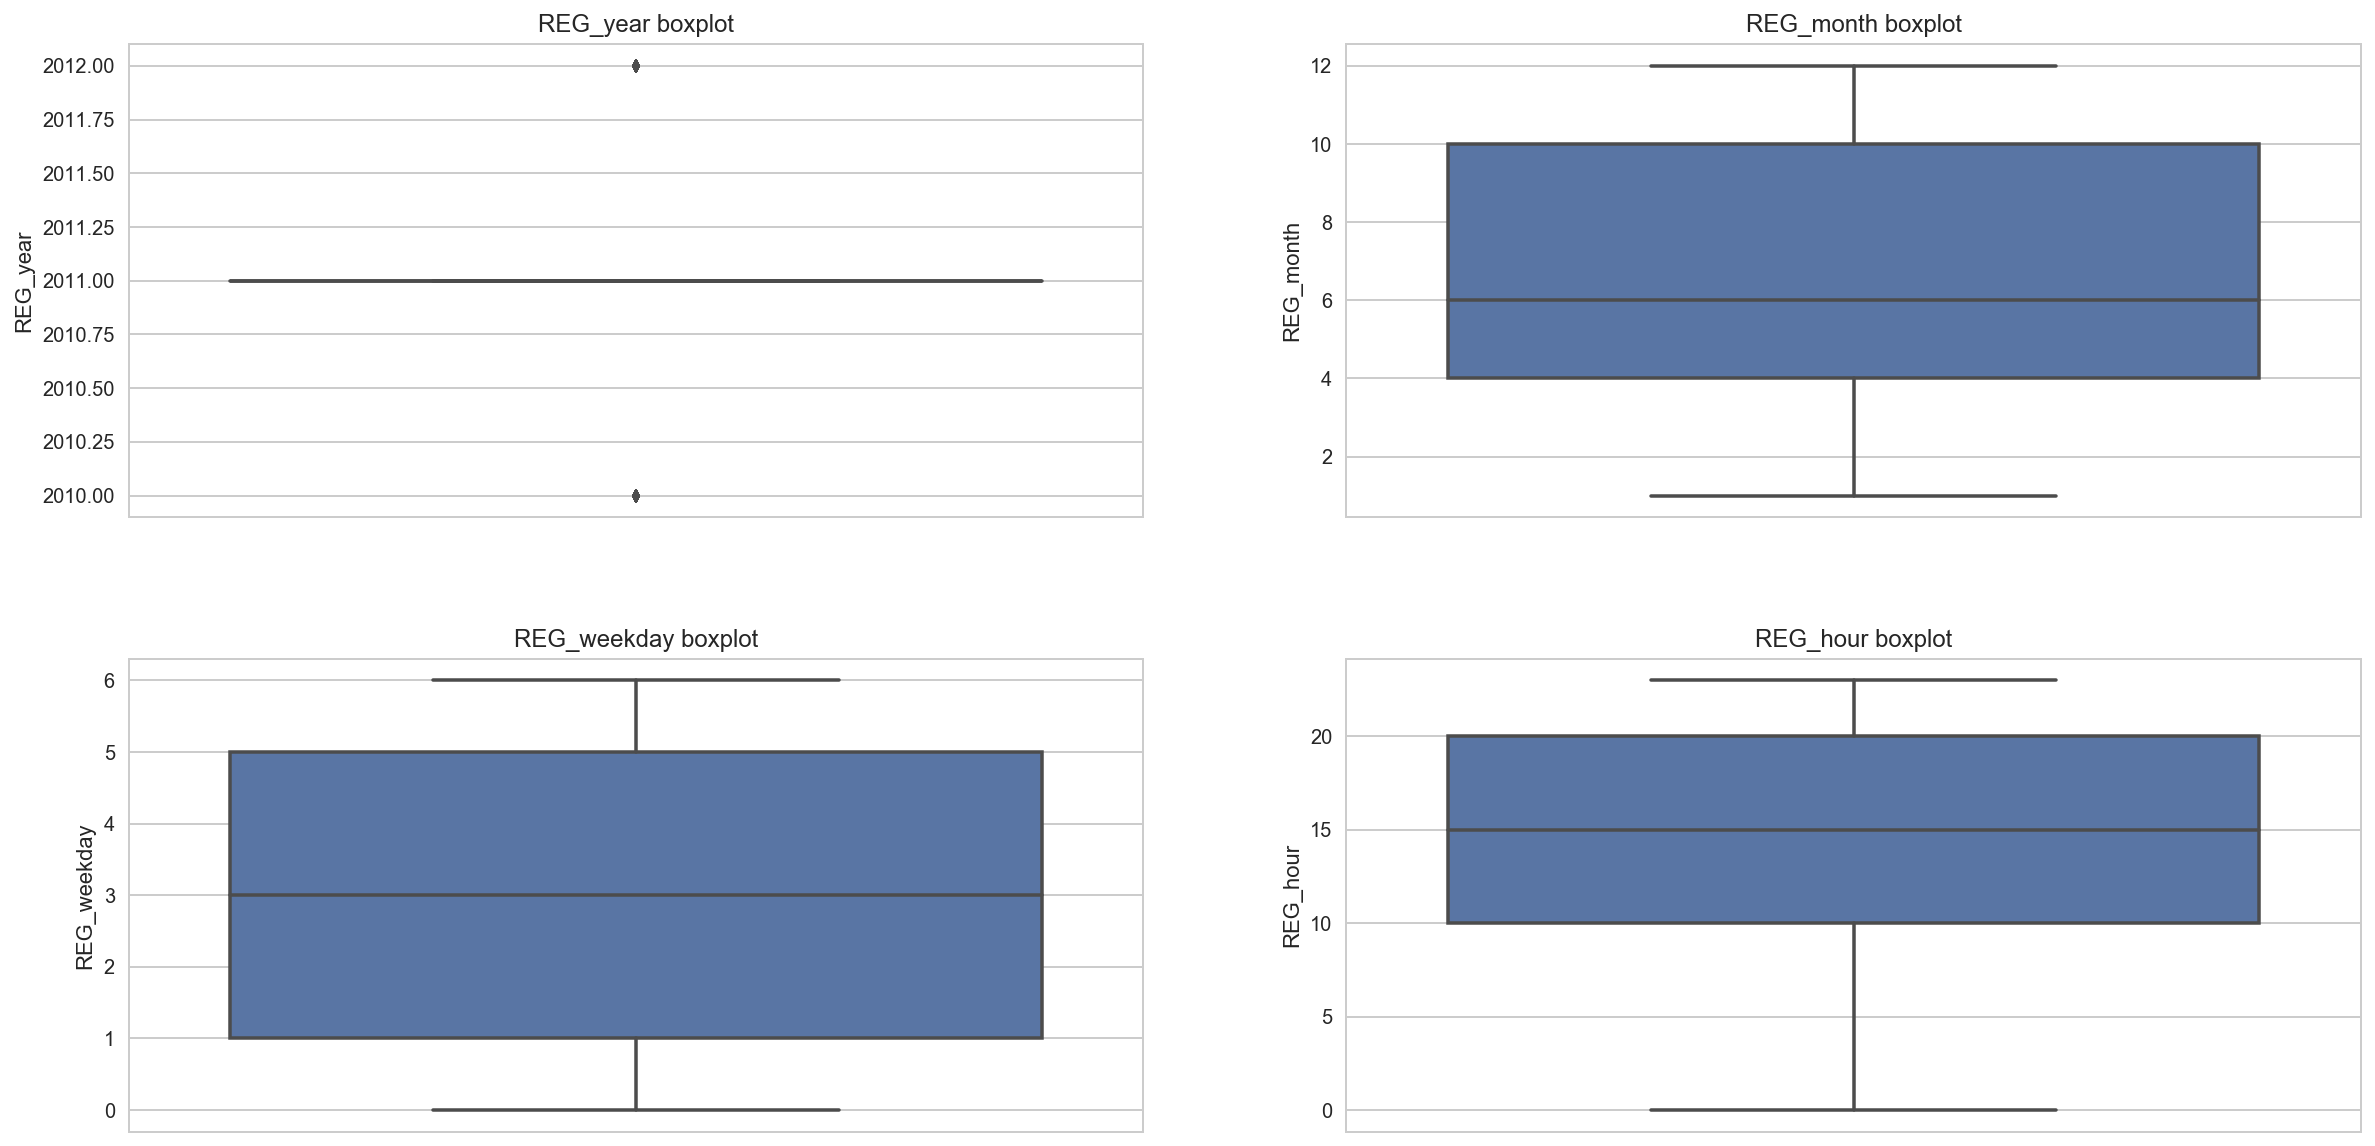

In [13]:
# feature boxplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2, 2, i-5)
    sns.boxplot(y = train[train.columns[i]], data = train)
    plt.title('{} boxplot'.format(train.columns[i]))

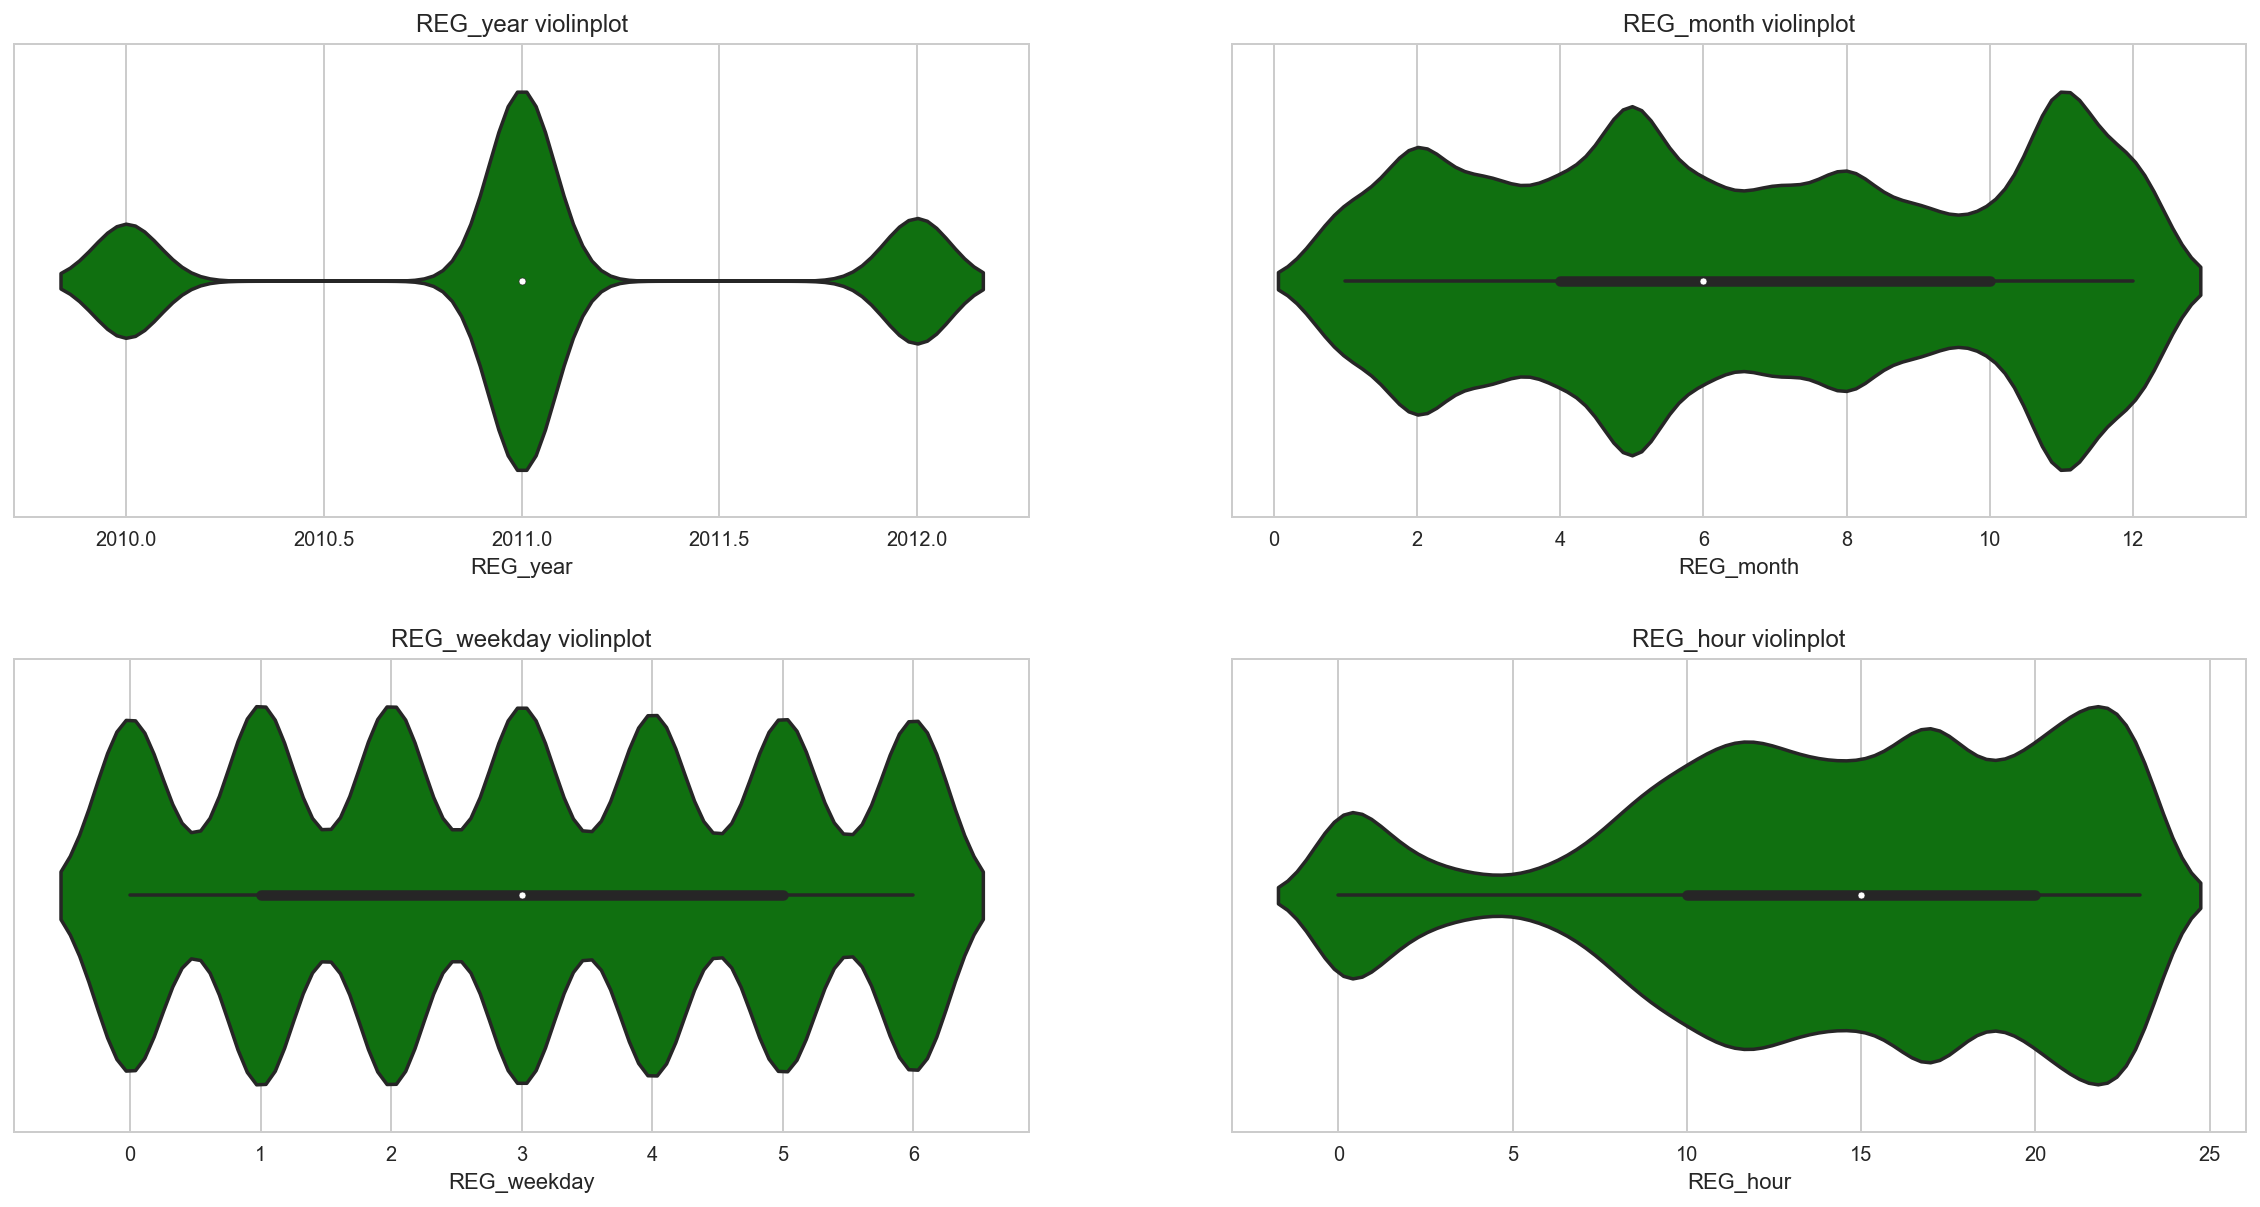

In [15]:
# feature violinplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2, 2, i-5)
    sns.violinplot(x = train[train.columns[i]], color = 'green', data = train)
    plt.title('{} violinplot'.format(train.columns[i]))

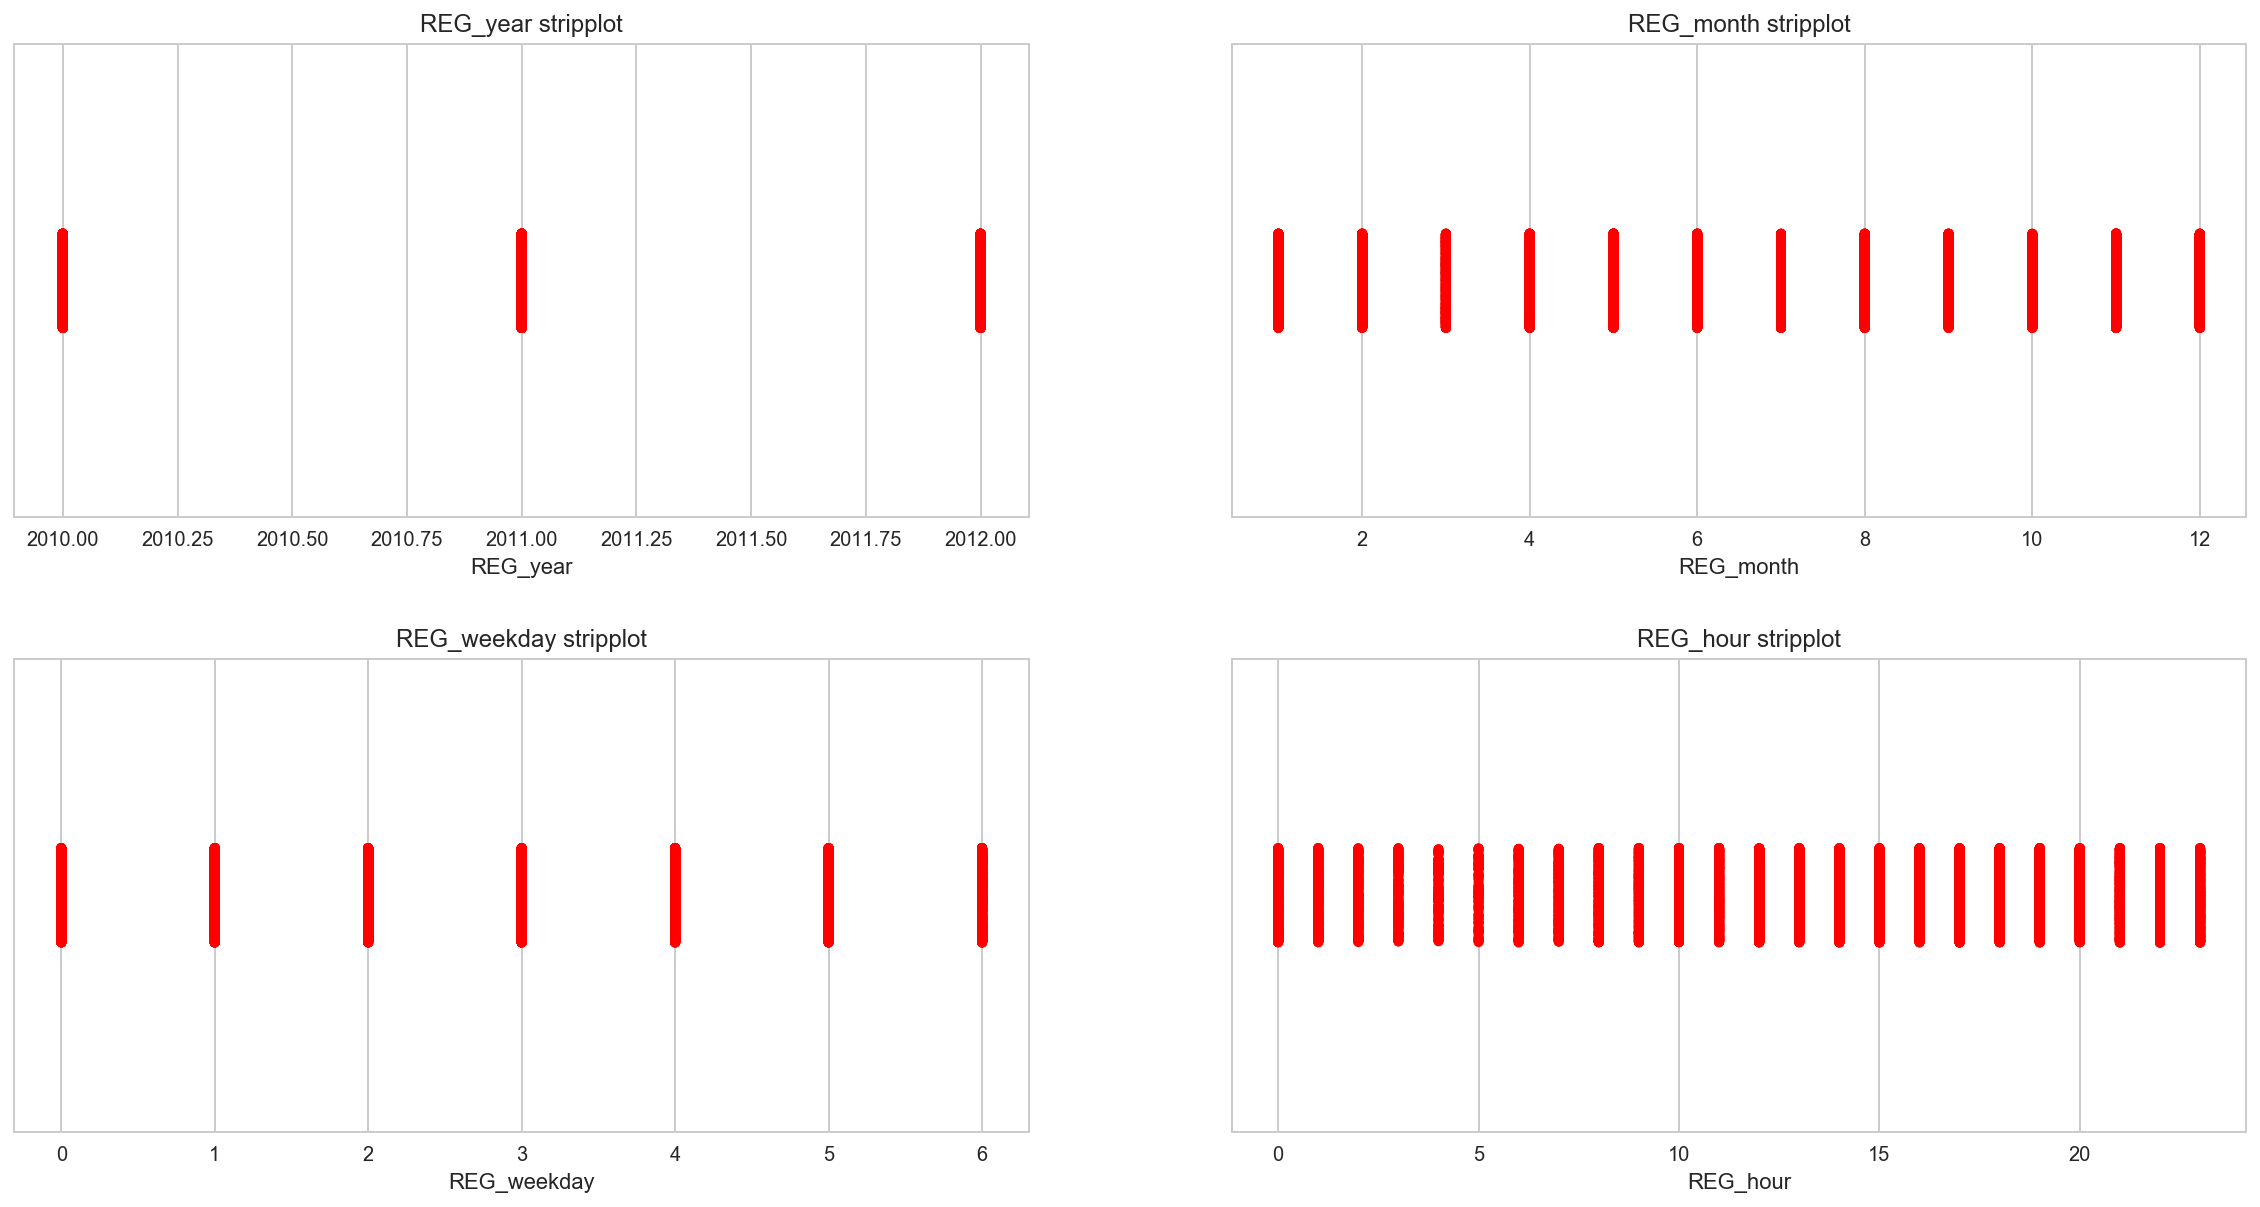

In [16]:
# feature stripplot
plt.figure(figsize=(20, 10))
subplots_adjust(hspace = 0.3)

for i in range(6, 9+1):
    plt.subplot(2, 2, i-5)
    sns.stripplot(x = train[train.columns[i]], data = train, color = 'red', jitter = True)
    plt.title('{} stripplot'.format(train.columns[i]))

In [18]:
ls = ['USER_ID_hash', 'SEX_ID', 'AGE', 'REG_year', 'REG_month', 'REG_weekday', 'REG_hour']
train = train[ls]
train.tail()

,USER_ID_hash,SEX_ID,AGE,REG_year,REG_month,REG_weekday,REG_hour
22868,2f0a2f36a9f63b6ba2fa3a7e53bef906,f,24,2011,12,0,15
22869,6ae7811a9c7c58546d6a1567ab098c21,m,41,2011,8,2,0
22870,a417308c6a79ae0d86976401ec2e3b04,f,35,2012,4,3,12
22871,4937ec1c86e71d901c4ccc0357cff0b1,f,59,2011,2,6,10
22872,280f0cedda5c4b171ee6245889659571,f,38,2011,2,3,15


In [19]:
train.to_csv('data/user_list.csv', index = 0)